**Problem Statement: A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.
Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.**

In [1]:
#Importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading dataset
data=pd.read_csv('blackFriday_train.csv')

In [3]:
#checking overview of the data
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
#checking shape
data.shape

(550068, 12)

**In this we can see that there are 5,50,068 rows and 12 columns present in the dataset.**

In [5]:
#checking type of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


**In this we can see that 2 columns have float data type, 5 columns have integer data type and 5 columns have object data type.**

In [6]:
#checking for null values
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
#checking percentage of null values
data.isna().sum()/data.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

**In this we can see that in column product category 1 31% null values are there and in column product category 69% null values are there.**

# In this we can see that there are two columns which irrelavant at the time of prediction. So dropping that columns

In [8]:
#Droppping unwanted columns
data=data.drop(['User_ID','Product_ID'],axis=1)
data.head(2)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200


**So we can see that both the columns have been dropped.**

In [9]:
#checking for duplicates
data.duplicated().sum()

5261

**So we can see that there are about 5261 duplicates present in the dataset.So dropping the duplicates.**

In [10]:
#Dropping Duplicates
data.drop_duplicates(inplace=True)
data.shape

(544807, 10)

**So we can see that duplicates have been dropped**

In [11]:
#Filling null values
data['Product_Category_2']=data['Product_Category_2'].fillna(data['Product_Category_2'].median())
data['Product_Category_3']=data['Product_Category_3'].fillna(data['Product_Category_3'].median())

In [12]:
#checking for null values
data.isna().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

**So we can see that null values have been treated.**

# Checking for unique values

In [13]:
#checking for unique values
data['Gender'].unique()

array(['F', 'M'], dtype=object)

**It gives us the information the gender or sex of the user.**

In [14]:
#checking for unique values
data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

**It gives us the information about the age of the users in specific groups.**

In [15]:
#checking for unique values
data['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

**It gives us the information about the occupation of the user which is in a encoded form.**

In [16]:
#checking for unique values
data['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

**It gives us the information about the catgerories of the cities.**

In [17]:
#checking for unique values
data['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

**It gives us the information about how long a user staying in a particular city.**

In [18]:
#checking for unique values
data['Marital_Status'].unique()

array([0, 1], dtype=int64)

**It gives us the infromation about the marital status of the user which is already encoded.**

In [19]:
#checking for unique values
data['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

**It gives us the information about the product which belongs to catgeory 1 which are already encoded.**

In [20]:
#checking for unique values
data['Product_Category_2'].unique()

array([ 9.,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12., 10.,
       17., 13.,  7., 18.])

**It gives us the information about the product which belongs to catgeory 2 which are already encoded.**

In [21]:
#checking for unique values
data['Product_Category_3'].unique()

array([14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3., 18.,
       11., 10.])

**It gives us the information about the product which belongs to catgeory 3 which are already encoded.**

In [22]:
#checking for unique values
data['Purchase'].unique()

array([ 8370, 15200,  1422, ...,   135,   123,   613], dtype=int64)

**It gives us the information about the purchase amount.**

# Checking for number of  unique values

In [23]:
#Checking for number of unique values
data.nunique()

Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

# Checking for value counts

In [24]:
for i in data:
    print(data[i].value_counts())
    print('\n')

M    410031
F    134776
Name: Gender, dtype: int64


26-35    217362
36-45    109153
18-25     98310
46-50     45385
51-55     38246
55+       21375
0-17      14976
Name: Age, dtype: int64


4     71004
0     68861
7     58507
1     47036
17    39716
20    33265
12    30954
14    27146
2     26364
16    25200
6     20177
3     17530
10    12823
15    12114
5     12112
11    11537
19     8403
13     7669
18     6591
9      6260
8      1538
Name: Occupation, dtype: int64


B    228702
C    170047
A    146058
Name: City_Category, dtype: int64


1     191562
2     100985
3      94506
4+     83972
0      73782
Name: Stay_In_Current_City_Years, dtype: int64


0    321238
1    223569
Name: Marital_Status, dtype: int64


5     148398
1     140129
8     112002
11     24100
2      23857
6      20450
3      20170
4      11686
16      9805
15      6287
13      5473
10      5125
12      3927
7       3716
18      3106
20      2528
19      1540
14      1521
17       577
9        410
Name: Product_Cat

In [25]:
#Replacing + with empty space in column Age
data['Age']=data['Age'].replace('55+','55-60')

In [26]:
#Replacing age groups to Child, Teen, Adult and Old
data['Age']=data['Age'].str.replace('0-17','Child')
data['Age']=data['Age'].str.replace('18-25','Teen')
data['Age']=data['Age'].str.replace('26-35','Adult')
data['Age']=data['Age'].str.replace('36-45','Adult')
data['Age']=data['Age'].str.replace('46-50','Adult')
data['Age']=data['Age'].str.replace('51-55','Old')
data['Age']=data['Age'].str.replace('55-60','Old')

In [27]:
#Checking the value count
data['Age'].value_counts()

Adult    371900
Teen      98310
Old       59621
Child     14976
Name: Age, dtype: int64

In [28]:
#Replacing + with empty space in column Stay in current city
data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].str.replace('+',' ')

In [29]:
#Checking the value count
data['Stay_In_Current_City_Years'].value_counts()

1     191562
2     100985
3      94506
4      83972
0      73782
Name: Stay_In_Current_City_Years, dtype: int64

In [30]:
#Since the type of data of column stay in current city is object, now changing it to integer
data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].astype(int)

In [31]:
#Checking data type of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544807 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      544807 non-null  object 
 1   Age                         544807 non-null  object 
 2   Occupation                  544807 non-null  int64  
 3   City_Category               544807 non-null  object 
 4   Stay_In_Current_City_Years  544807 non-null  int32  
 5   Marital_Status              544807 non-null  int64  
 6   Product_Category_1          544807 non-null  int64  
 7   Product_Category_2          544807 non-null  float64
 8   Product_Category_3          544807 non-null  float64
 9   Purchase                    544807 non-null  int64  
dtypes: float64(2), int32(1), int64(4), object(3)
memory usage: 43.6+ MB


**Now we can see that the data type of column stay in current city have been changed fro object to integer type.**

In [32]:
#Appending categorical data columns into cat features
cat_features=[]
for i in data:
    if data[i].dtype=='object':
        cat_features.append(i)
print(cat_features)        

['Gender', 'Age', 'City_Category']


In [33]:
#Appending Continuous data columns into cont features
cont_features=[]
for i in data:
    if data[i].dtype!='object':
        cont_features.append(i)
print(cont_features)

['Occupation', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']


# Dist Plots

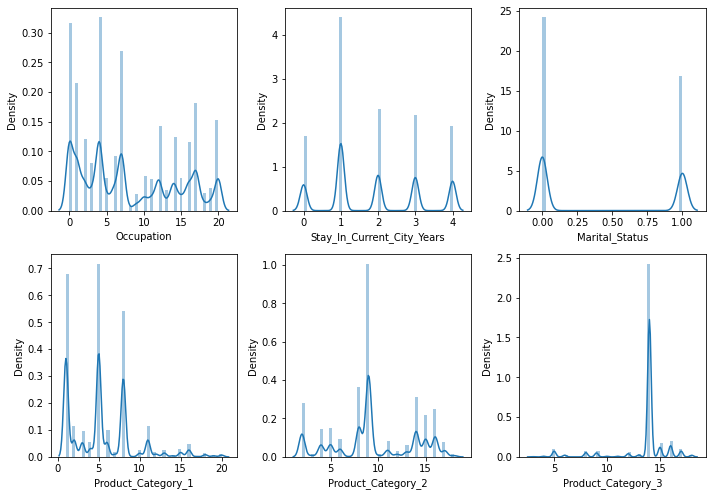

In [38]:
#Plotting dist plots
plt.figure(figsize=(10,7))
plotnumber=1
for column in cont_features:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(data[column])
    plotnumber+=1
plt.tight_layout()

**Observation**
* **Since the column occupation, stay in current city years and marital status are already been encoded that is the reason it is coming into continuous features. But we are not gonna count it into continuous features.**
* **So continuous feature columns are Product Category 1 Product Category 2 and Product Category 3.**
* **So in all three column i can  see skewness as th data is not normally distributed. So to cross verify it io further i will check the skewness.**
* **It can can be seen that outliers also can be present in all three columns which will be cross verify with the help of box plots.**

# Count Plot

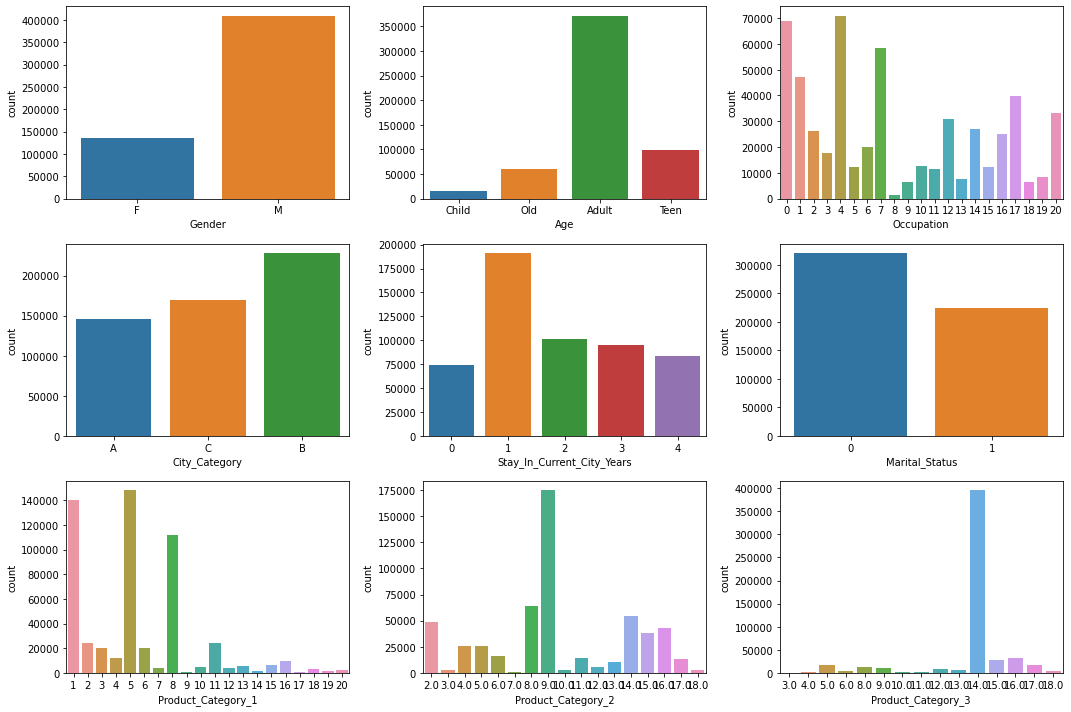

In [37]:
#Plotting Count Plot
plt.figure(figsize=(15,10))
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(data[column])
    plotnumber+=1
plt.tight_layout()

**Observation**
* **In plot Gender we can see that the male users are more than the female users.**
* **In plot Age we can see that most of the users are Adult as compared to other age category.**
* **In plot Occupation most of the users h=are having value as 4.**
* **In the plot City category we can see that most of the users are from city category B.**
* **In the plot stay in current city years most of the users are staying in a particular city from past one year.**
* **In the plot product category 1, most of the users are purchasing product having value as 5 followed by 1 and 8.**
* **In the plot product category 2, most of the users are purchasing product having value as 9.0.**
* **In the plot product category 3, most of the users are purchasing product having value as 14.0.**

# Bar Plot

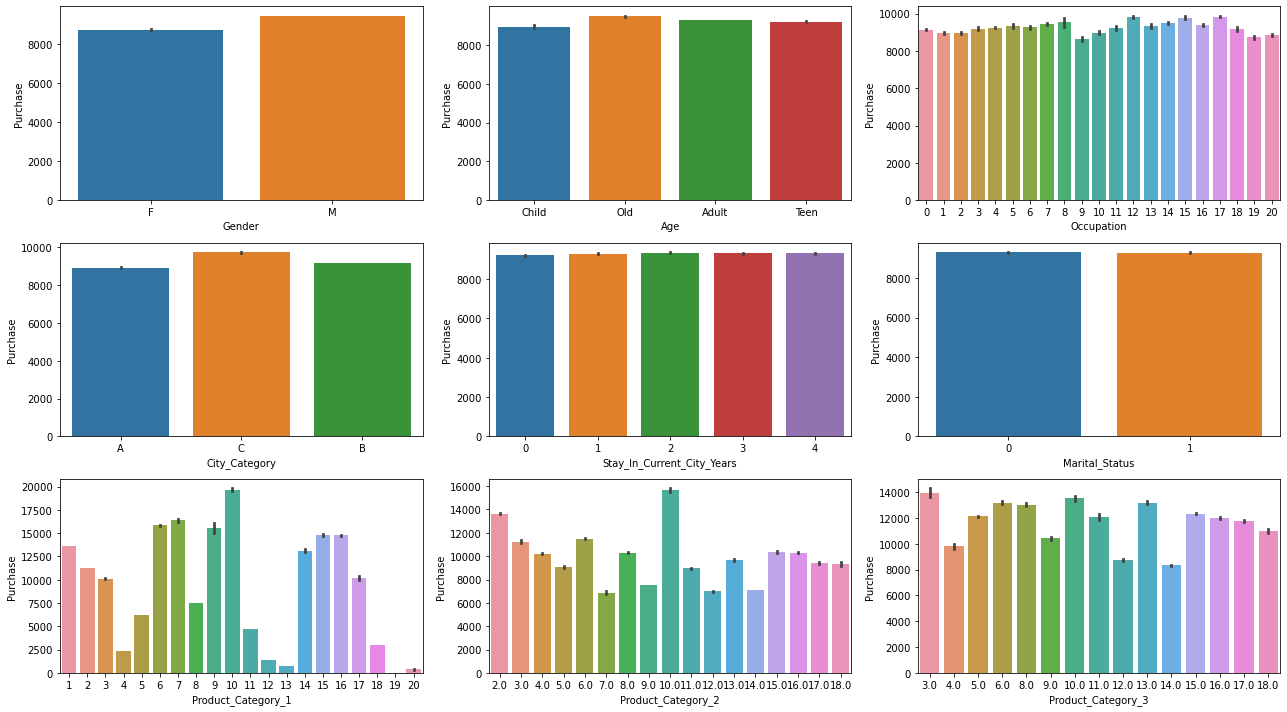

In [358]:
#Plotting Bar Plot
plt.figure(figsize=(18,10))
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.barplot(x=data[column],y=data['Purchase'])
        plt.xticks
    plotnumber+=1
plt.tight_layout()

**Observation**
* **In the above plot Gender vs Purchase we can see that Male users have purcahsed more than the Female users.**
* **In the above plot Age vs Purchase we can see that users which are old have purchased more as compared to other age category users.**
* **In the above plot Occupation vs Purchase we can see that users with occupation valueas 12, 15 and 17 have purchased more.**
* **In the above plot City catgeory vs Purchase we can see that users from city category C have purcahsed more than that of other city categories.**
* **In the above plot stay in current city in years vs Purchase we can see that users staying their particular cities from past 0, 1, 2, 3, and 4 years have purchased equally.**
* **In the above plot Marital status vs Purchase we can see that both the users who are married as well as who are not married have purchase equally.**
* **In the above plot Product category 1 vs Purchase users have purchased more with value 10 from product category 1.**
* **In the above plot Product category 2 vs Purchase users have purchased more with value 10 from product category 2.**
* **In the above plot Product category 3 vs Purchase users have purchased more with value 3.0 from product category 3.**

# Line Plot

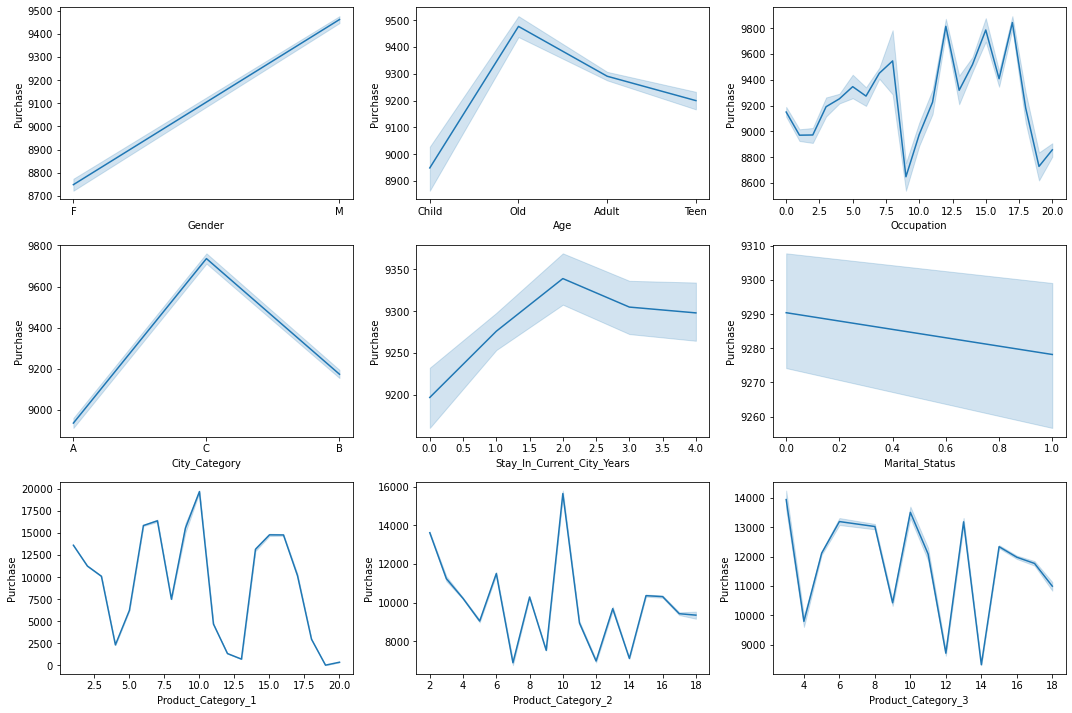

In [359]:
#Plotting Line Plot
plt.figure(figsize=(15,10))
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.lineplot(x=data[column],y=data['Purchase'])
        plt.xticks
    plotnumber+=1
plt.tight_layout()

**Observation**
* **In the above plot Gender vs Purchase we can see that Male users have purcahsed more than the Female users.**
* **In the above plot Age vs Purchase we can see that users which are old have purchased more as compared to other age category users.**
* **In the above plot Occupation vs Purchase we can see that users with occupation valueas 12, 15 and 17 have purchased more.**
* **In the above plot City catgeory vs Purchase we can see that users from city category C have purcahsed more than that of other city categories.**
* **In the above plot stay in current city in years vs Purchase we can see that users staying in their particular cities from past 2 years have purchased more.**
* **In the above plot Marital status vs Purchase we can see that both the users who are not married have purchase more than the users which are married.**
* **In the above plot Product category 1 vs Purchase users have purchased more with value 10 from product category 1.**
* **In the above plot Product category 2 vs Purchase users have purchased more with value 10 from product category 2.**
* **In the above plot Product category 3 vs Purchase users have purchased more with value 3.0 from product category 3.**

# Pie Plots

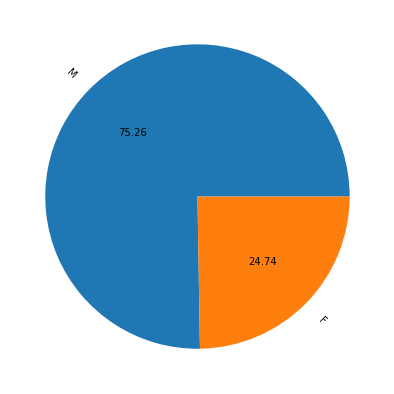

In [57]:
#plotting pie plot
plt.figure(figsize=(10,7))
labels='M','F'
plt.pie(x=data['Gender'].value_counts(),labels=labels,autopct='%.2f',rotatelabels=True)
plt.show()

**Observation**
* **From the above plot we can see that Male users are more than that of female users.**

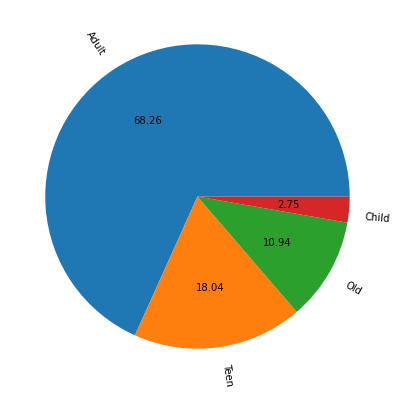

In [360]:
#plotting pie plot
plt.figure(figsize=(10,7))
labels='Adult','Teen','Old','Child'
plt.pie(x=data['Age'].value_counts(),labels=labels,autopct='%.2f',rotatelabels=True)
plt.show()

**Observation**
* **From the above plot we can see that Adult users are more than that of other age category users.**

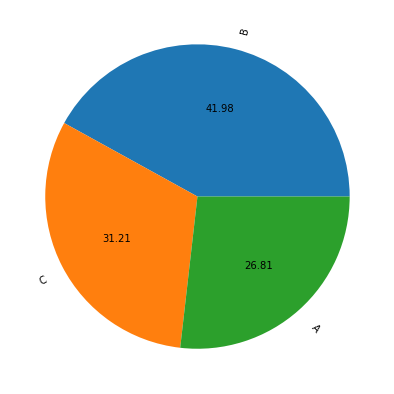

In [267]:
#plotting pie plot
plt.figure(figsize=(10,7))
labels='B','C','A'
plt.pie(x=data['City_Category'].value_counts(),labels=labels,autopct='%.2f',rotatelabels=True)
plt.show()

**Observation**
* **From the above we can see that Users are more from B city category.**

# Top 100 high priced produts

In [36]:
#checking for top 100 high priced products
high_priced_products=data.sort_values(by='Purchase',ascending=False)[:100]
high_priced_products

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
370891,M,Adult,17,C,3,0,10,15.0,14.0,23961
93016,M,Adult,0,C,1,0,10,15.0,14.0,23961
87440,M,Adult,4,A,2,1,10,15.0,14.0,23961
321782,M,Old,0,C,1,1,10,15.0,14.0,23960
292083,M,Adult,1,B,2,1,10,15.0,14.0,23960
...,...,...,...,...,...,...,...,...,...,...
541477,M,Adult,17,B,1,1,10,13.0,16.0,23921
330333,M,Adult,0,A,2,1,10,15.0,14.0,23921
378558,M,Adult,7,C,1,1,10,9.0,14.0,23920
78131,F,Adult,0,B,4,1,10,9.0,14.0,23920


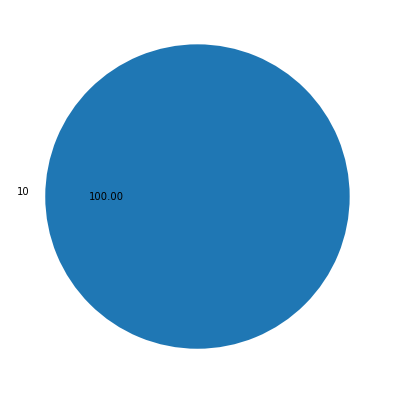

In [276]:
#plotting pie plot
plt.figure(figsize=(10,7))
labels=high_priced_products['Product_Category_1'].unique()
plt.pie(x=high_priced_products['Product_Category_1'].value_counts(),labels=labels,autopct='%.2f',rotatelabels=True)
plt.show()

**Observation**
* **From the above plot we can see most of the highest priced product from product category 1 is with value 10.**

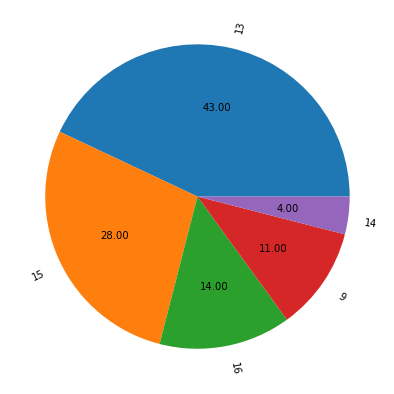

In [288]:
#plotting pie plot
plt.figure(figsize=(10,7))
labels='13','15','16','9','14'
plt.pie(x=high_priced_products['Product_Category_2'].value_counts(),labels=labels,autopct='%.2f',rotatelabels=True)
plt.show()

**Observation**
* **From the above plot we can see most of the highest priced product from product category 2 is with value 13.**

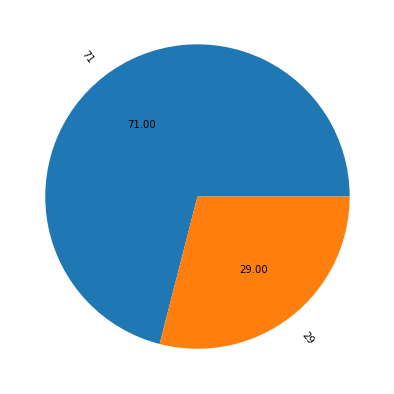

In [290]:
#plotting pie plot
plt.figure(figsize=(10,7))
labels='71','29'
plt.pie(x=high_priced_products['Product_Category_3'].value_counts(),labels=labels,autopct='%.2f',rotatelabels=True)
plt.show()

**Observation**
* **From the above plot we can see most of the highest priced product from product category 3 is with value 71.**

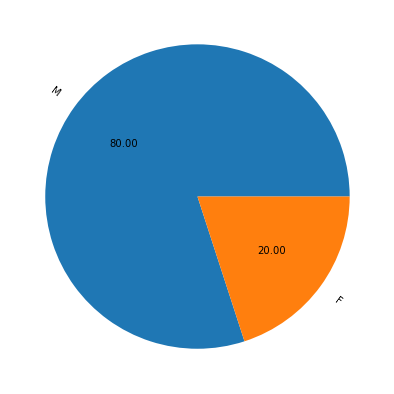

In [278]:
#plotting pie plot
plt.figure(figsize=(10,7))
labels=high_priced_products['Gender'].unique()
plt.pie(x=high_priced_products['Gender'].value_counts(),labels=labels,autopct='%.2f',rotatelabels=True)
plt.show()

**Observation**
* **From the above plot we can see most of the highest priced product are purchased more by male users.**

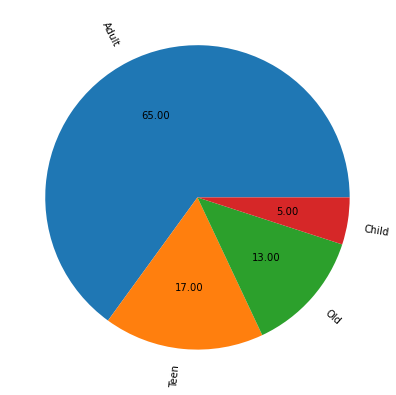

In [37]:
#plotting pie plot
plt.figure(figsize=(10,7))
labels='Adult','Teen','Old','Child'
plt.pie(x=high_priced_products['Age'].value_counts(),labels=labels,autopct='%.2f',rotatelabels=True)
plt.show()

**Observation**
* **From the above plot we can see most of the highest priced product are purchased more by Adult users.**

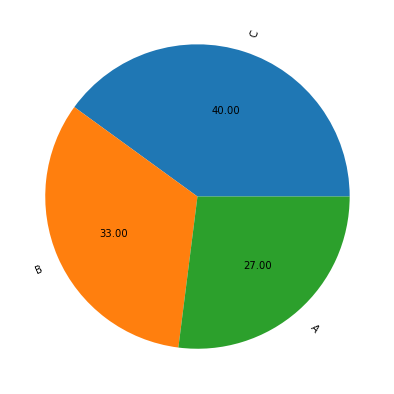

In [282]:
#plotting pie plot
plt.figure(figsize=(10,7))
labels='C','B','A'
plt.pie(x=high_priced_products['City_Category'].value_counts(),labels=labels,autopct='%.2f',rotatelabels=True)
plt.show()

**Observation**
* **From the above plot we can see most of the highest priced product are purchased more users from city category C.**

# Cheapest Priced Products

In [363]:
#Checking for lowest 100 priced products
low_priced_products=data.sort_values(by='Purchase',ascending=True)[:100]
low_priced_products

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
546606,M,Adult,3,A,4,1,19,9.0,14.0,12
549009,M,Teen,4,C,1,0,19,9.0,14.0,12
547107,F,Adult,3,C,1,1,19,9.0,14.0,12
546379,M,Teen,4,C,0,0,19,9.0,14.0,12
546467,F,Adult,20,C,1,1,19,9.0,14.0,12
...,...,...,...,...,...,...,...,...,...,...
546173,M,Adult,17,B,2,0,19,9.0,14.0,12
547423,M,Adult,14,B,1,1,19,9.0,14.0,13
549843,M,Adult,0,B,3,1,19,9.0,14.0,13
548586,M,Adult,0,C,3,0,19,9.0,14.0,13


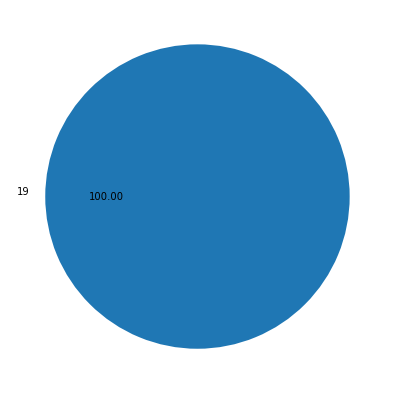

In [292]:
#plotting pie plot
plt.figure(figsize=(10,7))
labels=low_priced_products['Product_Category_1'].unique()
plt.pie(x=low_priced_products['Product_Category_1'].value_counts(),labels=labels,autopct='%.2f',rotatelabels=True)
plt.show()

**Observation**
* **From the above plot we can see most of the lowest priced product from product category 1 is with value 19.**

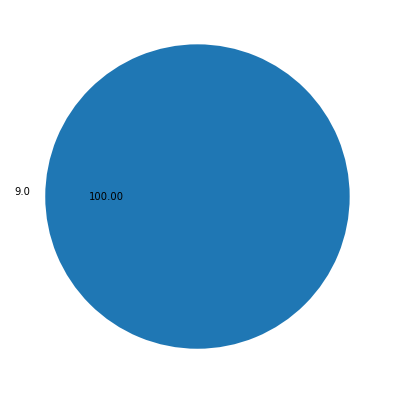

In [294]:
#plotting pie plot
plt.figure(figsize=(10,7))
labels=low_priced_products['Product_Category_2'].unique()
plt.pie(x=low_priced_products['Product_Category_2'].value_counts(),labels=labels,autopct='%.2f',rotatelabels=True)
plt.show()

**Observation**
* **From the above plot we can see most of the lowest priced product from product category 2 is with value 9.0.**

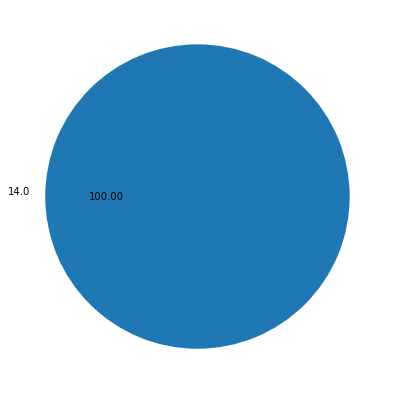

In [296]:
#plotting pie plot
plt.figure(figsize=(10,7))
labels=low_priced_products['Product_Category_3'].unique()
plt.pie(x=low_priced_products['Product_Category_3'].value_counts(),labels=labels,autopct='%.2f',rotatelabels=True)
plt.show()

**Observation**
* **From the above plot we can see most of the lowest priced product from product category 3 is with value 14.0.**

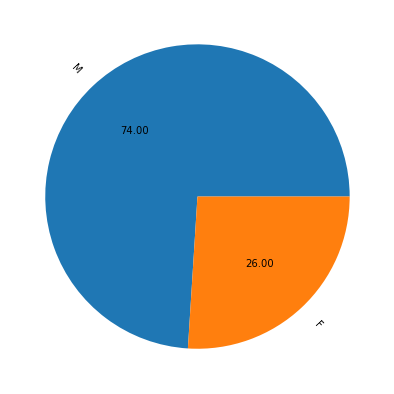

In [298]:
#plotting pie plot
plt.figure(figsize=(10,7))
labels=low_priced_products['Gender'].unique()
plt.pie(x=low_priced_products['Gender'].value_counts(),labels=labels,autopct='%.2f',rotatelabels=True)
plt.show()

**Observation**
* **From the above plot we can see most of the lowest priced product are purchased more by male users.**

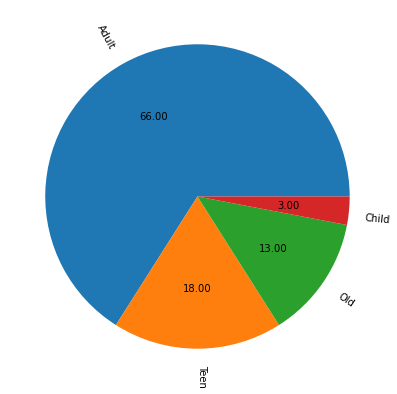

In [364]:
#plotting pie plot
plt.figure(figsize=(10,7))
labels='Adult','Teen','Old','Child'
plt.pie(x=low_priced_products['Age'].value_counts(),labels=labels,autopct='%.2f',rotatelabels=True)
plt.show()

**Observation**
* **From the above plot we can see most of the lowest priced product are purchased more by Adult users.**

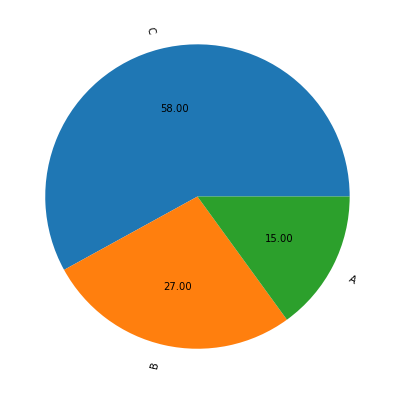

In [302]:
#plotting pie plot
plt.figure(figsize=(10,7))
labels='C','B','A'
plt.pie(x=low_priced_products['City_Category'].value_counts(),labels=labels,autopct='%.2f',rotatelabels=True)
plt.show()

**Observation**
* **From the above plot we can see most of the lowest priced product are purchased more by users from city category C.**

In [365]:
#Importing required libraries
from sklearn.preprocessing import LabelEncoder

In [366]:
#Encoding column
lab_enc=LabelEncoder()

In [367]:
# Let's convert the categorical data to numerical data for test data
for i in cat_features:
    data[i]=lab_enc.fit_transform(data[i])

In [368]:
data.head(2)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,0,2,0,3,9.0,14.0,8370
1,0,1,10,0,2,0,1,6.0,14.0,15200


**So we can see that categorical columns have been encoded.**

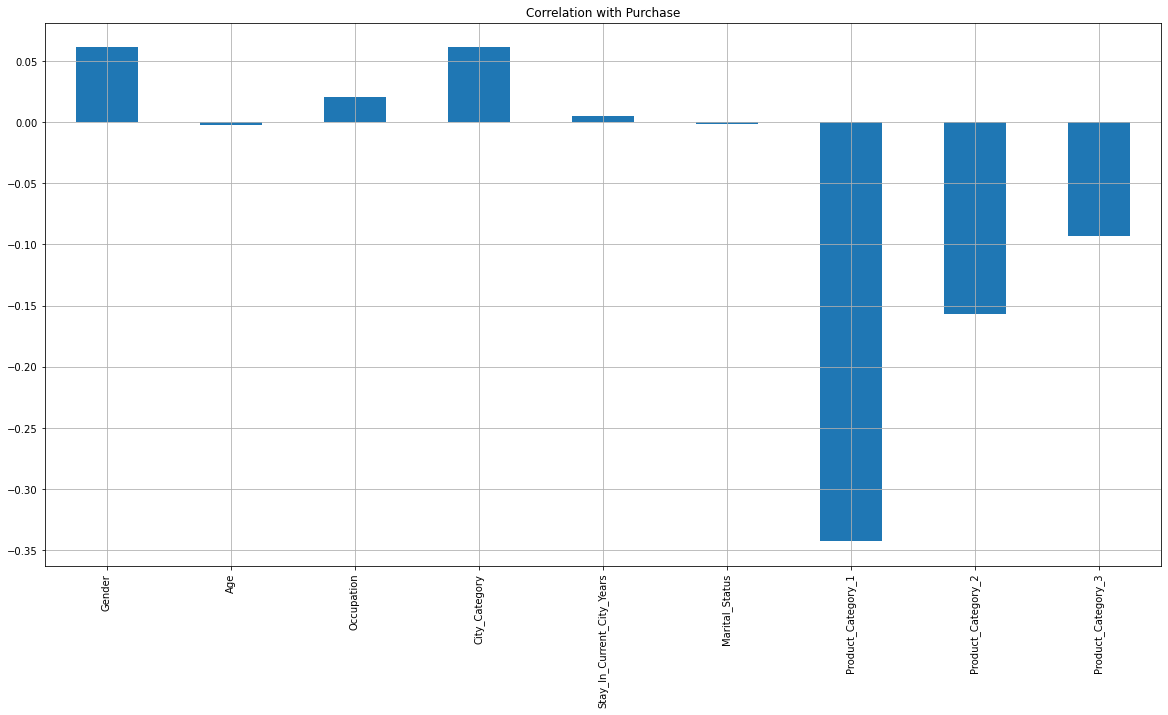

In [369]:
#Checking for correlation
data.drop(['Purchase'],axis=1).corrwith(data['Purchase']).plot(kind='bar',grid=True,figsize=(20,10),title='Correlation with Purchase')
plt.show()

**Observation**
* **From the above plot we can see that Product category 1 is highly negatively correlated to the label and Marital status and Age are very least correlated to the label.**

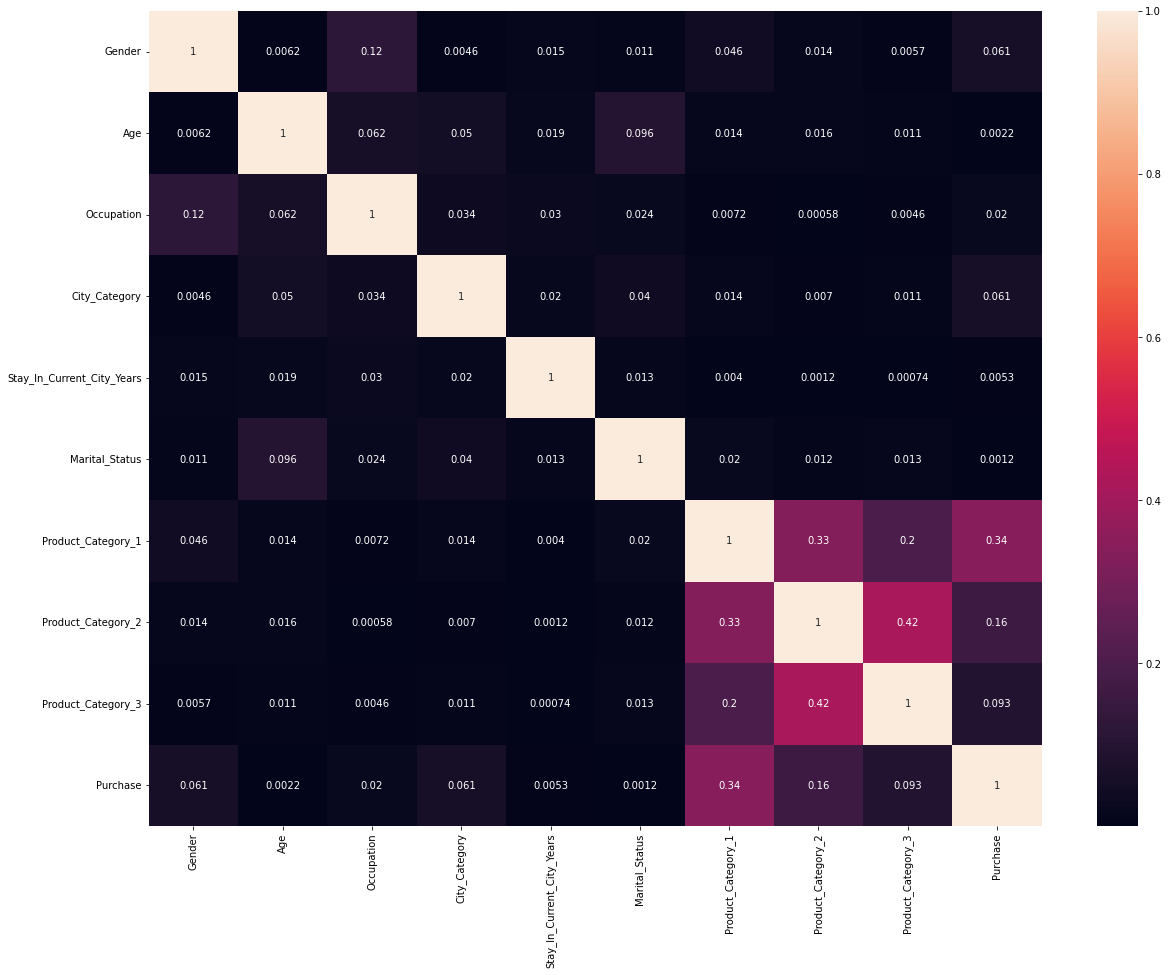

In [370]:
#Plotting heatmap
corr=data.corr().abs()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)
plt.show()

**Observation**
* **By looking at the Heatmap we can see that not single feature is multicorrelated with the other features as i dont see any value which is more than 75%. So i feel that there is no multicollinearity problem within the features. But to cross verify it further i will use vif method.**

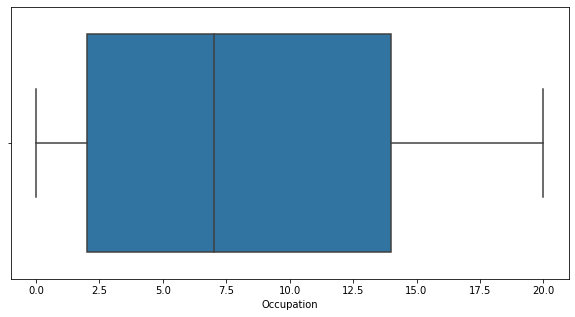

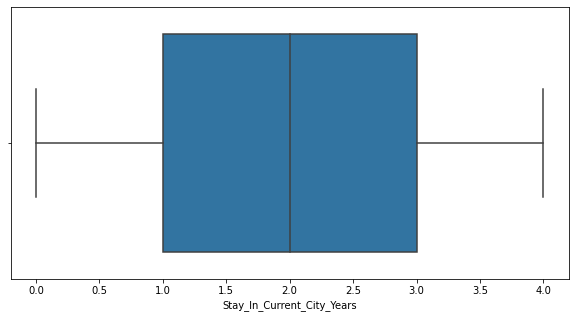

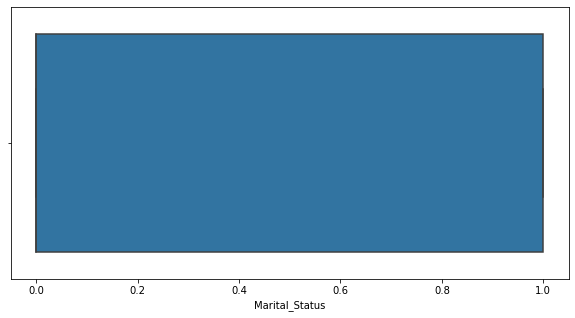

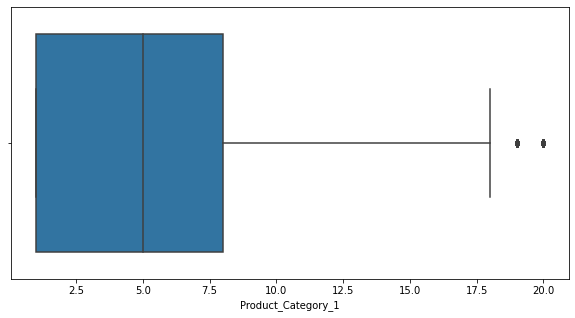

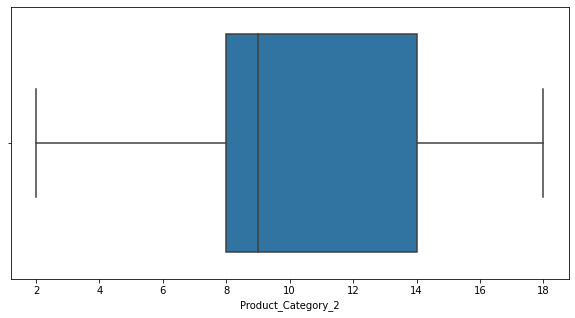

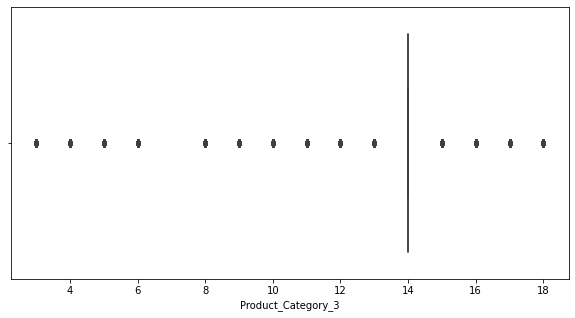

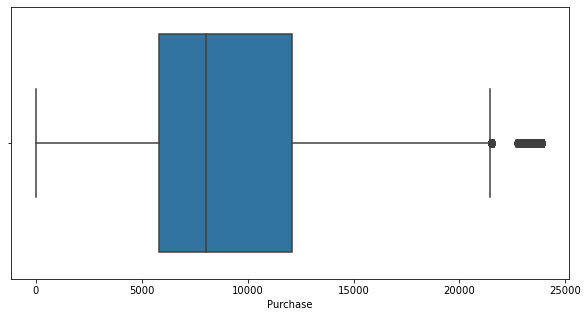

In [371]:
#plotting boxplot
for i in cont_features:
    plt.figure(figsize=(10,5))
    sns.boxplot(data[i])
    plt.show()

**Observation**
* **In the above plots only product category 1, product category 2 and product category 3 columns are continuous features and among those product category 1 and product category 3 have outliers. So further i will removing outliers by using z-score method**

In [372]:
#Importing required libraries
from scipy.stats import zscore

In [373]:
#Removing outliers
z_score=zscore(data[['Product_Category_1','Product_Category_3']])
abs_z_score=np.abs(z_score)
threshold=3
z=(abs_z_score<3).all(axis=1)

In [374]:
data[z].shape

(513635, 10)

In [375]:
data.shape

(544807, 10)

In [376]:
#Percentage Loss of Data
data_loss=((544807-513635)/544807)*100
print(f'Data Loss:{data_loss} %')

Data Loss:5.72165922978229 %


In [377]:
data=data[z]
data.shape

(513635, 10)

In [378]:
#checking skewness
data[cont_features].skew()

Occupation                    0.398019
Stay_In_Current_City_Years    0.314597
Marital_Status                0.360397
Product_Category_1            0.729719
Product_Category_2           -0.041998
Product_Category_3           -1.780584
Purchase                      0.663594
dtype: float64

**So we can see that column product category 1 and product category 3 have skewness. So by using power transform method i will treat the skewness.**

In [379]:
#Importing required libraries
from sklearn.preprocessing import power_transform

In [380]:
data[['Product_Category_1','Product_Category_3']]=power_transform(data[['Product_Category_1','Product_Category_3']],method='yeo-johnson')
data[['Product_Category_1','Product_Category_3']]

,Product_Category_1,Product_Category_3
0,-0.531181,-0.115542
1,-1.420192,-0.115542
2,1.551835,-0.115542
3,1.551835,-0.115542
4,0.810958,-0.115542
...,...,...
545909,0.093987,-0.115542
545910,0.810958,-0.115542
545912,0.810958,-0.115542
545913,0.093987,-0.115542


In [381]:
#checking skewness
data[cont_features].skew()

Occupation                    0.398019
Stay_In_Current_City_Years    0.314597
Marital_Status                0.360397
Product_Category_1           -0.071389
Product_Category_2           -0.041998
Product_Category_3            0.388485
Purchase                      0.663594
dtype: float64

In [382]:
#Dividing dataset into features and label
#Features
x=data.drop(['Purchase'],axis=1)
#Label
y=data['Purchase']

In [383]:
#Standardiziing the data
#Importing require libraries
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x_scaler=Scaler.fit_transform(x)
x_scaler

array([[-1.73949013,  0.17797829,  0.29307507, ..., -0.53118142,
        -0.21488077, -0.11554167],
       [-1.73949013,  0.17797829,  0.29307507, ..., -1.42019222,
        -0.94304663, -0.11554167],
       [-1.73949013,  0.17797829,  0.29307507, ...,  1.55183493,
        -0.21488077, -0.11554167],
       ...,
       [ 0.5748811 , -0.64846958, -0.31948454, ...,  0.81095777,
        -0.21488077, -0.11554167],
       [ 0.5748811 , -0.64846958, -0.31948454, ...,  0.09398672,
        -0.21488077, -0.11554167],
       [ 0.5748811 , -0.64846958, -0.31948454, ..., -1.42019222,
        -1.91393443, -1.87421741]])

In [384]:
x_scaler.shape

(513635, 9)

In [385]:
#Importing require libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [386]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaler,i)for i in range(x_scaler.shape[1])]
vif['feature']=x.columns
vif

,vif,feature
0,1.019991,Gender
1,1.016587,Age
2,1.020458,Occupation
3,1.007676,City_Category
4,1.002077,Stay_In_Current_City_Years
5,1.012191,Marital_Status
6,1.149888,Product_Category_1
7,1.196457,Product_Category_2
8,1.063683,Product_Category_3


**Observation**
* **So we can see that there is no multicollinearity problem within the features as the values are less than 5.**

# TEST DATA

In [454]:
#Loading test data set
data1=pd.read_csv('blackFriday_test.csv')

In [455]:
#checking overview of the test dataset
data1.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN


In [456]:
#checking shape
data1.shape

(233599, 11)

**So we can see that in test dataset there are about 2,33,599 rows and 11 columns are present.**

In [457]:
#Checking for null values
data1.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

**So we can see that there are about 72,344 null values present in column product category 2 and 1,62,252 null values in column product category 3.**

In [458]:
#Checking for percentage of null values present in dataset
data1.isna().sum()/data1.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            30.969311
Product_Category_3            69.590195
dtype: float64

**So we can see that there 30% null values present in column product category 2 and 69% in column product category 3.**

In [459]:
#Dropping unwanted columns
data1=data1.drop(['User_ID','Product_ID'],axis=1)
data1.shape

(233599, 9)

**Dropped column user id and product as they were irrelevant at the time of prediction.**

In [460]:
#Checking for duplicates
data1.duplicated().sum()

141971

**So we can see that there are about 1,41,971 duplicates present in the dataset.**

In [461]:
#Removing duplicates
data1.drop_duplicates(inplace=True)
data1.shape

(91628, 9)

**So we can see that duplicates have been removed from the dataset.**

In [462]:
#Checking for types of data
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91628 entries, 0 to 233598
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      91628 non-null  object 
 1   Age                         91628 non-null  object 
 2   Occupation                  91628 non-null  int64  
 3   City_Category               91628 non-null  object 
 4   Stay_In_Current_City_Years  91628 non-null  object 
 5   Marital_Status              91628 non-null  int64  
 6   Product_Category_1          91628 non-null  int64  
 7   Product_Category_2          79979 non-null  float64
 8   Product_Category_3          43168 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 7.0+ MB


**So we can see that there are about 2 columns which have float data type, 3 columns which have integer data type and 4 columns have object data type.**

In [463]:
#Checking for unique values
data1['Gender'].unique()

array(['M', 'F'], dtype=object)

In [464]:
#Checking for unique values
data1['Age'].unique()

array(['46-50', '26-35', '36-45', '18-25', '51-55', '55+', '0-17'],
      dtype=object)

In [465]:
#Checking for unique values
data1['Occupation'].unique()

array([ 7, 17,  1, 15,  3,  0,  8, 16,  4, 12, 13, 18, 11,  9,  2, 20, 14,
       10,  6, 19,  5], dtype=int64)

In [466]:
#Checking for unique values
data1['City_Category'].unique()

array(['B', 'C', 'A'], dtype=object)

In [467]:
#Checking for unique values
data1['Stay_In_Current_City_Years'].unique()

array(['2', '0', '4+', '1', '3'], dtype=object)

In [468]:
#Checking for unique values
data1['Marital_Status'].unique()

array([1, 0], dtype=int64)

In [469]:
#Checking for unique values
data1['Product_Category_1'].unique()

array([ 1,  3,  5,  4,  2, 10, 15, 18,  8, 13,  6, 11, 12,  7, 16, 14, 17,
        9], dtype=int64)

In [470]:
#Checking for unique values
data1['Product_Category_2'].unique()

array([11.,  5., 14.,  9.,  3.,  4., 13.,  2., nan,  8., 15., 17., 12.,
       16.,  6., 10., 18.,  7.])

In [471]:
#Checking for unique values
data1['Product_Category_3'].unique()

array([nan, 12., 15.,  9., 16., 14.,  4.,  3.,  5.,  8., 17., 13., 11.,
       10.,  6., 18.])

In [472]:
#treating null values
data1['Product_Category_2']=data1['Product_Category_2'].fillna(data1['Product_Category_2'].median())
data1['Product_Category_3']=data1['Product_Category_3'].fillna(data1['Product_Category_3'].median())

In [473]:
#checking for null values
data1.isna().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

**So we can see that null values have been treated.**

In [474]:
#Replacing 55+ with 55-60 in column age
data1['Age']=data1['Age'].replace('55+','55-60')

In [475]:
#Replacing age categories with Adult, Child, Teen and Old
#Replacing age groups to Child, Teen, Adult and Old
data1['Age']=data1['Age'].str.replace('0-17','Child')
data1['Age']=data1['Age'].str.replace('18-25','Teen')
data1['Age']=data1['Age'].str.replace('26-35','Adult')
data1['Age']=data1['Age'].str.replace('36-45','Adult')
data1['Age']=data1['Age'].str.replace('46-50','Adult')
data1['Age']=data1['Age'].str.replace('51-55','Old')
data1['Age']=data1['Age'].str.replace('55-60','Old')

In [476]:
#Checking for value counts
data1['Age'].value_counts()

Adult    61766
Teen     14681
Old      12788
Child     2393
Name: Age, dtype: int64

In [478]:
#Replacing 4+ with 4 in column stay in current city years
data1['Stay_In_Current_City_Years']=data1['Stay_In_Current_City_Years'].replace('4+','4')

In [479]:
#Checking for value counts
data1['Stay_In_Current_City_Years'].value_counts()

1    29349
2    17692
3    16633
4    14495
0    13459
Name: Stay_In_Current_City_Years, dtype: int64

In [480]:
#Converting the data type of column Stay_In_Current_City_Years from Object to intger
data1['Stay_In_Current_City_Years']=data1['Stay_In_Current_City_Years'].astype(int)

In [481]:
#checking for data type
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91628 entries, 0 to 233598
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      91628 non-null  object 
 1   Age                         91628 non-null  object 
 2   Occupation                  91628 non-null  int64  
 3   City_Category               91628 non-null  object 
 4   Stay_In_Current_City_Years  91628 non-null  int32  
 5   Marital_Status              91628 non-null  int64  
 6   Product_Category_1          91628 non-null  int64  
 7   Product_Category_2          91628 non-null  float64
 8   Product_Category_3          91628 non-null  float64
dtypes: float64(2), int32(1), int64(3), object(3)
memory usage: 6.6+ MB


In [482]:
#Checking for number of unique values
data1.nunique()

Gender                         2
Age                            4
Occupation                    21
City_Category                  3
Stay_In_Current_City_Years     5
Marital_Status                 2
Product_Category_1            18
Product_Category_2            17
Product_Category_3            15
dtype: int64

In [484]:
#Checking for value counts
for i in data1:
    print(data1[i].value_counts())
    print('\n')

M    66431
F    25197
Name: Gender, dtype: int64


Adult    61766
Teen     14681
Old      12788
Child     2393
Name: Age, dtype: int64


0     10300
7      8926
1      8594
4      8178
17     6915
20     5808
12     5585
14     5013
16     4730
2      4727
6      3946
3      3547
15     2560
11     2393
5      2289
10     1981
19     1590
13     1583
18     1326
9      1279
8       358
Name: Occupation, dtype: int64


B    35897
C    32908
A    22823
Name: City_Category, dtype: int64


1    29349
2    17692
3    16633
4    14495
0    13459
Name: Stay_In_Current_City_Years, dtype: int64


0    50997
1    40631
Name: Marital_Status, dtype: int64


1     28298
5     16969
8     11944
2      7931
6      5438
3      4144
11     3717
4      3269
10     1893
15     1640
13     1589
16     1286
12     1158
7       803
18      649
14      533
17      184
9       183
Name: Product_Category_1, dtype: int64


8.0     23602
2.0      9195
14.0     8261
15.0     8122
5.0      7353
16.0     7337
4.0  

In [485]:
#Appending categorical data columns into cat features
cat_features1=[]
for i in data1:
    if data1[i].dtype=='object':
        cat_features1.append(i)
print(cat_features1)

['Gender', 'Age', 'City_Category']


In [486]:
#Appending Continuous data columns into cont features
cont_features1=[]
for i in data1:
    if data1[i].dtype!='object':
        cont_features1.append(i)
print(cont_features1)

['Occupation', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']


# Dist plots

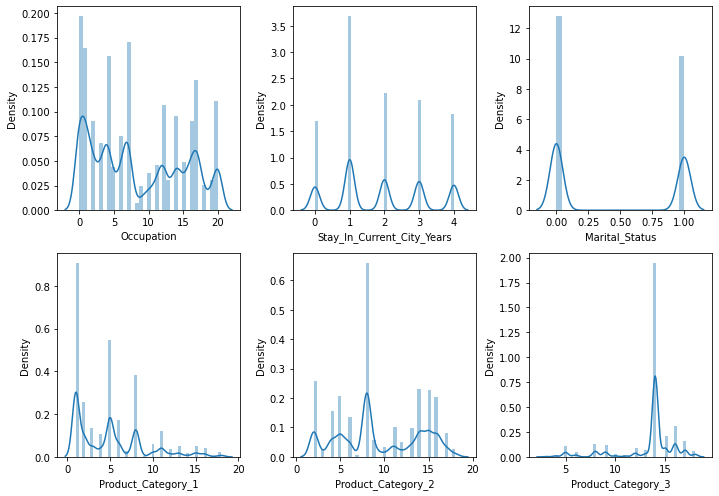

In [487]:
#Plotting dist plots
plt.figure(figsize=(10,7))
plotnumber=1
for column in cont_features1:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(data1[column])
    plotnumber+=1
plt.tight_layout()

**Observation**
* **Since the column occupation, stay in current city years and marital status are already been encoded that is the reason it is coming into continuous features. But we are not gonna count it into continuous features.**
* **So continuous feature columns are Product Category 1 Product Category 2 and Product Category 3.**
* **So in all three column i can  see skewness as th data is not normally distributed. So to cross verify it io further i will check the skewness.**
* **It can can be seen that outliers also can be present in all three columns which will be cross verify with the help of box plots.**

# Count Plot

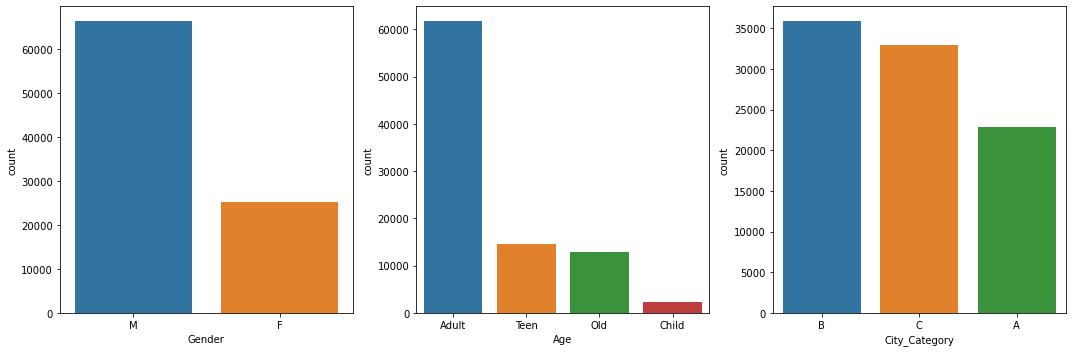

In [488]:
#Plotting Count Plot
plt.figure(figsize=(15,5))
plotnumber=1
for column in cat_features1:
    if plotnumber<=3:
        ax=plt.subplot(1,3,plotnumber)
        sns.countplot(data1[column])
    plotnumber+=1
plt.tight_layout()

**Observation**
* **In plot Gender we can see that the male users are more than the female users.**
* **In plot Age we can see that most of the users are Adult as compared to other age category.**
* **In the plot City category we can see that most of the users are from city category B.**

# Pie Plot

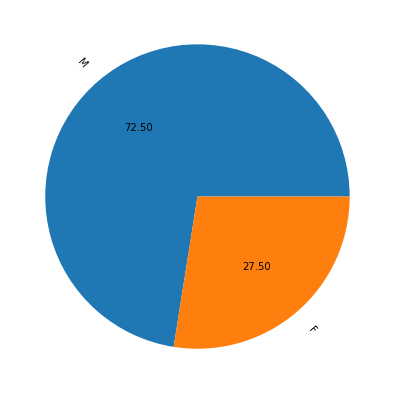

In [495]:
#plotting pie plot
plt.figure(figsize=(10,7))
labels='M','F'
plt.pie(x=data1['Gender'].value_counts(),labels=labels,autopct='%.2f',rotatelabels=True)
plt.show()

**Observation**
* **From the above plot we can see that Male users are more than that of female users.**

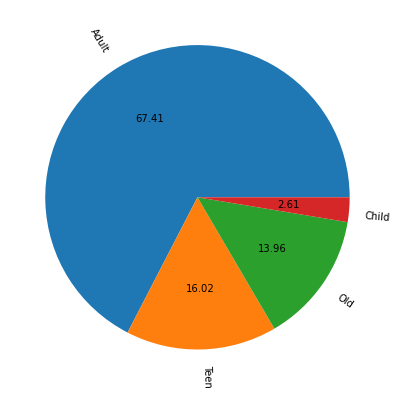

In [496]:
#plotting pie plot
plt.figure(figsize=(10,7))
labels='Adult','Teen','Old','Child'
plt.pie(x=data1['Age'].value_counts(),labels=labels,autopct='%.2f',rotatelabels=True)
plt.show()

**Observation**
* **From the above plot we can see that Adult users are more than that of other user age category.**

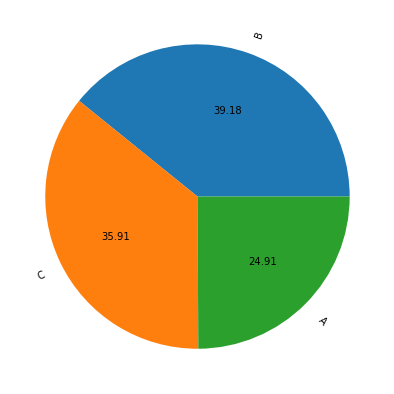

In [498]:
#plotting pie plot
plt.figure(figsize=(10,7))
labels='B','C','A'
plt.pie(x=data1['City_Category'].value_counts(),labels=labels,autopct='%.2f',rotatelabels=True)
plt.show()

**Observation**
* **From the above plot we can see that most of the users are from city category B.**

In [501]:
#Importing required libraries
from sklearn.preprocessing import LabelEncoder

In [502]:
#Encoding column
lab_enc=LabelEncoder()

In [508]:
# Let's convert the categorical data to numerical data for test data
for i in cat_features1:
    data1[i]=lab_enc.fit_transform(data1[i])

In [510]:
data1.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1,0,7,1,2,1,1,11.0,14.0
1,1,0,17,2,0,0,3,5.0,14.0
2,0,0,1,1,4,1,5,14.0,14.0
3,0,0,1,1,4,1,4,9.0,14.0
4,0,0,1,2,1,0,4,5.0,12.0


**So we can see that categorical columns have been encoded.**

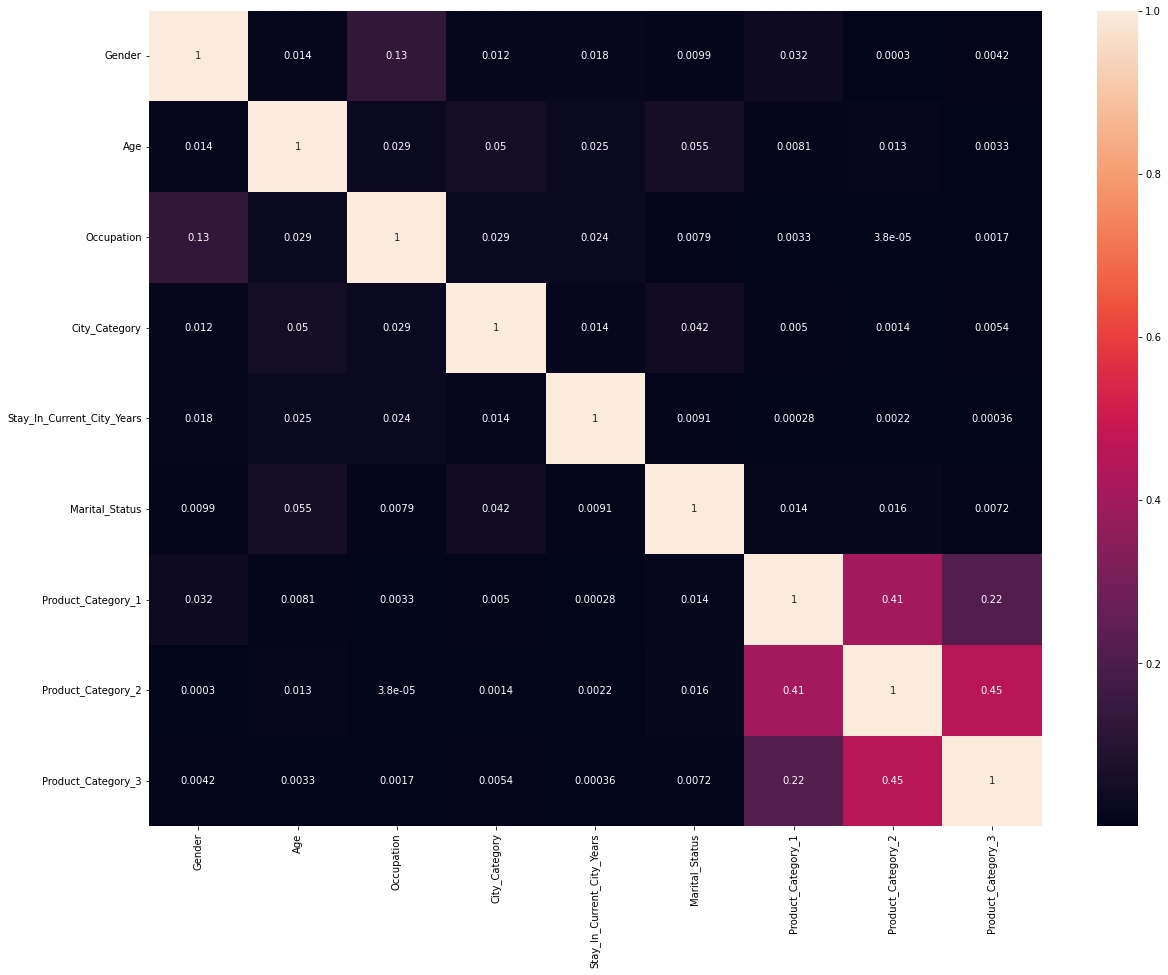

In [507]:
#Plotting heatmap
corr=data1.corr().abs()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)
plt.show()

**Observation**
* **By looking at the Heatmap we can see that not single feature is multicorrelated with the other features as i dont see any value which is more than 75%. So i feel that there is no multicollinearity problem within the features.**

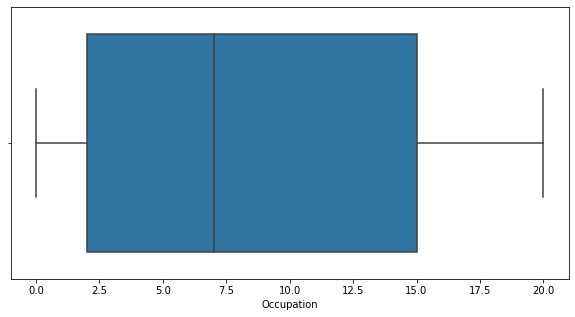

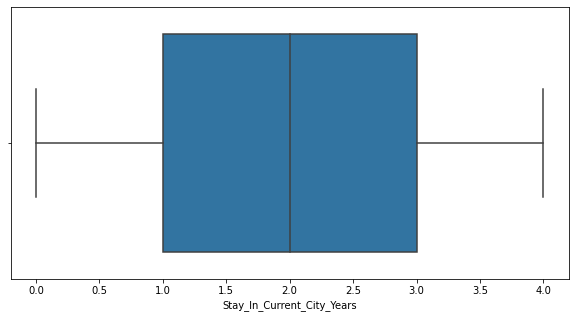

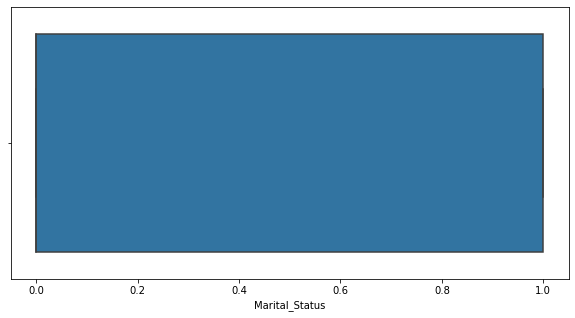

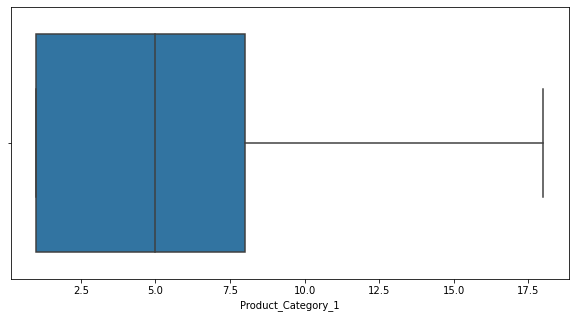

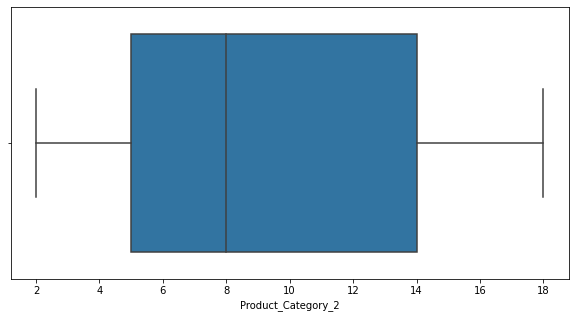

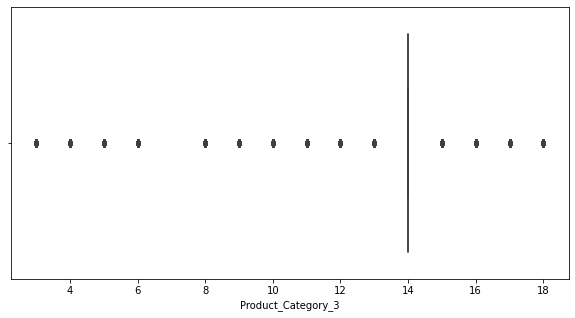

In [511]:
#plotting boxplot
for i in cont_features1:
    plt.figure(figsize=(10,5))
    sns.boxplot(data1[i])
    plt.show()

**Observation**
* **In the above plots only product category 1, product category 2 and product category 3 columns are continuous features and among those product category 3 have outliers. So further i will removing outliers by using z-score method**

In [512]:
#Importing required libraries
from scipy.stats import zscore

In [513]:
#Removing outliers
z_score=zscore(data1[['Product_Category_3']])
abs_z_score=np.abs(z_score)
threshold=3
z=(abs_z_score<3).all(axis=1)

In [514]:
data1[z].shape

(90767, 9)

In [515]:
data1.shape

(91628, 9)

In [516]:
#Percentage Loss of Data
data_loss=((91628-90767)/91628)*100
print(f'Data Loss:{data_loss} %')

Data Loss:0.9396690967826429 %


In [517]:
data1=data1[z]
data1.shape

(90767, 9)

In [519]:
#checking skewness
data1[cont_features1].skew()

Occupation                    0.273608
Stay_In_Current_City_Years    0.246044
Marital_Status                0.225447
Product_Category_1            1.030294
Product_Category_2            0.075527
Product_Category_3           -1.651219
dtype: float64

**So we can see that column product category 1 and product category 3 have skewness. So by using power transform method i will treat the skewness.**

In [ ]:
#Importing required libraries
from sklearn.preprocessing import power_transform

In [522]:
data1[['Product_Category_1','Product_Category_3']]=power_transform(data1[['Product_Category_1','Product_Category_3']],method='yeo-johnson')
data1[['Product_Category_1','Product_Category_3']]

,Product_Category_1,Product_Category_3
0,-1.247601,-0.005351
1,-0.221875,-0.005351
2,0.360802,-0.005351
3,0.100353,-0.005351
4,0.100353,-0.882466
...,...,...
233586,-1.247601,-1.892260
233589,-0.642995,-0.005351
233596,-1.247601,-0.882466
233597,1.208708,-0.005351


In [523]:
#checking skewness
data1[cont_features1].skew()

Occupation                    0.273608
Stay_In_Current_City_Years    0.246044
Marital_Status                0.225447
Product_Category_1            0.016291
Product_Category_2            0.075527
Product_Category_3           -0.068423
dtype: float64